In [24]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from ballmapper.pyBallMapper import BallMapper

In [11]:
def generate_tpf(n=100, sigma=0.1):
    unif = ss.uniform()
    norm = ss.norm(loc=0, scale=sigma)
    x = unif.rvs(n)
    def tpf_(t):
        if t<0.3: return 2*t
        if t>0.7: return 1.4-t # perhaps 1.3-t?
        return 0.6
    y = list(map(tpf_, x))
    y += norm.rvs(n)
    return x, y

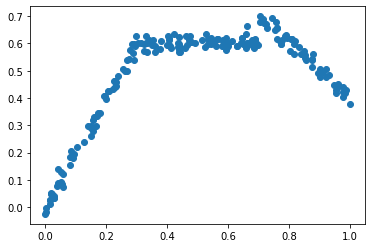

In [12]:
x, y = generate_tpf(n=200, sigma=0.02)
plt.plot(x, y, 'o')

In [13]:
def rmse_ols(n, sigma, mcloops=1000):
    rmses = []
    for mcloop in range(mcloops):
        x, y = generate_tpf(n=n, sigma=sigma)
        X = x.reshape(-1,1)
        lm = LinearRegression().fit(X,y)
        rmse = mean_squared_error(lm.predict(X), y, squared=False)
        rmses.append(rmse)
    return np.mean(rmses) 

In [14]:
sigmas = [0.02, 0.2, 0.5]
ns = [200, 500, 1000, 2000]
mcloops = 1000
rmses = []
for sigma in sigmas:
    for n in ns:
        rmses.append([sigma, n, rmse_ols(n=n, sigma=sigma, mcloops=mcloops)])

In [15]:
pd.DataFrame(rmses, columns=['sigma', 'n', 'OLS'])

,sigma,n,OLS
0,0.02,200,0.135165
1,0.02,500,0.136076
2,0.02,1000,0.136357
3,0.02,2000,0.136267
4,0.20,200,0.239125
5,0.20,500,0.240322
6,0.20,1000,0.240775
7,0.20,2000,0.241077
8,0.50,200,0.516054
9,0.50,500,0.516565
